In [1]:
import numpy as np
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
import pandas as pd
import pickle
%matplotlib inline
%load_ext autoreload
%autoreload 2

data_name = 'data_polyester'

## Run methods on each simulation datasets
This may take a while to run. The computed results are already stored in 
- Python methods: `./temp_result/res_ + data_name`
- R methods: `./temp_result/res_r_ + data_name`

where `data_name` is as defiend above. For those who do not 
want to run these again, they can directly move the figure generation
section. 

For those who wish to run the code to reproduce the results,
they need to specify the `data_path` below to be the path of 
`AdaFDRpaper_data` on their machine

The Python methods are run by calling `analysis_batch.py` while 
R methods are run by calling `analysis_batch.R`. It is easier to 
run them using `.sh` script but we include them here for 
illustration purpose. 

In [2]:
data_path = '/data3/martin/AdaFDRpaper_data'
input_folder = data_path + '/' + data_name

In [3]:
# Python methods
%run analysis_batch.py -i $input_folder -d $data_name 

input_folder: /data3/martin/AdaFDRpaper_data/data_polyester
output_folder: ./temp_result/res_data_polyester
alpha_list: [0.05, 0.1, 0.15, 0.2]
# Processing data_5 with alpha=0.05
# Processing data_5 with alpha=0.10
# Processing data_5 with alpha=0.15
# Processing data_5 with alpha=0.20
# Processing data_2 with alpha=0.05
# Processing data_2 with alpha=0.10
# Processing data_2 with alpha=0.15
# Processing data_2 with alpha=0.20
# Processing data_0 with alpha=0.05
# Processing data_0 with alpha=0.10
# Processing data_0 with alpha=0.15
# Processing data_0 with alpha=0.20
# Processing data_3 with alpha=0.05
# Processing data_3 with alpha=0.10
# Processing data_3 with alpha=0.15
# Processing data_3 with alpha=0.20
# Processing data_7 with alpha=0.05
# Processing data_7 with alpha=0.10
# Processing data_7 with alpha=0.15
# Processing data_7 with alpha=0.20
# Processing data_9 with alpha=0.05
# Processing data_9 with alpha=0.10
# Processing data_9 with alpha=0.15
# Processing data_9 with alph

In [4]:
# R methods
output_folder = './temp_result/res_r_' + data_name
if data_name in ['data_yeast', 'data_polyester', 'data_polyester_ui']:
    benchmark_bl = 'T'
else:
    benchmark_bl = 'F'

In [5]:
%%bash -s "$input_folder" "$output_folder" "$benchmark_bl"
Rscript analysis_batch.R $1 $2 $3

[1] "input_folder: /data3/martin/AdaFDRpaper_data/data_polyester"
[1] "output_folder: ./temp_result/res_r_data_polyester"
[1] "benchmark_bl: T"
[1] "data_0"
alpha = 0.57: FDPhat 0.5698, Number of Rej. 3712
alpha = 0.56: FDPhat 0.5598, Number of Rej. 3655
alpha = 0.55: FDPhat 0.5498, Number of Rej. 3607
alpha = 0.54: FDPhat 0.5398, Number of Rej. 3479
alpha = 0.53: FDPhat 0.5299, Number of Rej. 3429
alpha = 0.52: FDPhat 0.5197, Number of Rej. 3342
alpha = 0.51: FDPhat 0.5099, Number of Rej. 3299
alpha = 0.5: FDPhat 0.5, Number of Rej. 3248
alpha = 0.49: FDPhat 0.4898, Number of Rej. 3136
alpha = 0.48: FDPhat 0.4799, Number of Rej. 3059
alpha = 0.47: FDPhat 0.4699, Number of Rej. 3003
alpha = 0.46: FDPhat 0.4598, Number of Rej. 2938
alpha = 0.45: FDPhat 0.4499, Number of Rej. 2892
alpha = 0.44: FDPhat 0.44, Number of Rej. 2841
alpha = 0.43: FDPhat 0.4297, Number of Rej. 2802
alpha = 0.42: FDPhat 0.42, Number of Rej. 2743
alpha = 0.41: FDPhat 0.4097, Number of Rej. 2648
alpha = 0.4: FDPha

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven 

## Figure generation
### Collect the results from the saved file

In [4]:
alpha_list = [0.05, 0.1, 0.15, 0.2]
n_data = 10
summary_stats = {}
# Python methods
result_path_py = './temp_result/res_' + data_name + '/result.pickle'
with open(result_path_py, 'rb') as fil:
    result_py = pickle.load(fil)
for method in result_py.keys():
    if len(result_py[method])>0:
        summary_stats[method] = {}
        summary_stats[method]['FDP'] = np.zeros([n_data, len(alpha_list)])
        summary_stats[method]['Power'] = np.zeros([n_data, len(alpha_list)])
    else:
        continue
    for fdp,power,alpha,dname in result_py[method]:
        summary_stats[method]['FDP'][int(dname[-1]), alpha_list.index(alpha)] = fdp
        summary_stats[method]['Power'][int(dname[-1]), alpha_list.index(alpha)] = power
# R methods
result_path_r = './temp_result/res_r_' + data_name
r_method_list = ['ihw', 'adapt', 'bl']
for method in r_method_list:
    res_df = pd.read_table(result_path_r + '/res_' + method, delimiter=',') 
    summary_stats[method] = {}
    summary_stats[method]['FDP'] = np.zeros([n_data, len(alpha_list)])
    summary_stats[method]['Power'] = np.zeros([n_data, len(alpha_list)])
    for i in range(res_df.shape[0]):
        fdp,power,alpha,dname = res_df.iloc[i]
        summary_stats[method]['FDP'][int(dname[-1]), alpha_list.index(alpha)] = fdp
        summary_stats[method]['Power'][int(dname[-1]), alpha_list.index(alpha)] = power
# Delete when there is no result
method_list = list(summary_stats.keys())
for method in method_list:
    if np.sum(summary_stats[method]['Power']) == 0:
        del summary_stats[method]

### Generate the FDP and power plot

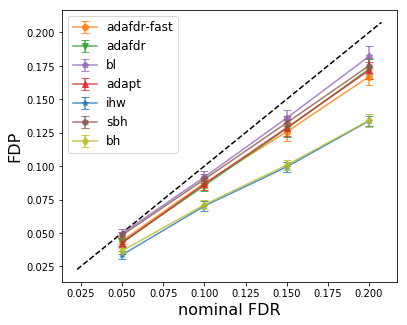

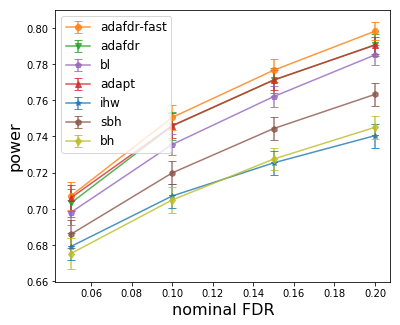

In [5]:
marker_list = ['o', 'v', 'p', '^', '*', 'h', 'd']
color_list = ['C1', 'C2', 'C4', 'C3', 'C0', 'C5', 'C8']
method_list = ['adafdr-fast', 'adafdr', 'bl', 'adapt', 'ihw', 'sbh', 'bh']
alpha_list = [0.05, 0.1, 0.15, 0.2]
n_data = 10
# FDP
plt.figure(figsize = [6, 5])
for i_method,method in enumerate(method_list):
    if method in summary_stats.keys():
        y_val = np.mean(summary_stats[method]['FDP'], axis=0)
        y_err = np.std(summary_stats[method]['FDP'], axis=0) / np.sqrt(n_data) * 1.96
        plt.errorbar(alpha_list, y_val, yerr=y_err, label=method,\
                     capsize=4, elinewidth = 1.5, linewidth=1.5,\
                     color = color_list[i_method], marker = marker_list[i_method],\
                     markersize = 6, alpha=0.8)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
axis_min = min(x_min, y_min)
axis_max = max(x_max, y_max)
plt.plot([axis_min, axis_max], [axis_min, axis_max], linestyle='--', color='k')
plt.legend(loc=2, fontsize=12)
plt.ylabel('FDP', fontsize=16)
plt.xlabel('nominal FDR', fontsize=16)
plt.show()
# Power 
plt.figure(figsize = [6, 5])
for i_method,method in enumerate(method_list):
    if method in summary_stats.keys():
        y_val = np.mean(summary_stats[method]['Power'], axis=0)
        y_err = np.std(summary_stats[method]['Power'], axis=0) / np.sqrt(n_data) * 1.96
        plt.errorbar(alpha_list, y_val, yerr=y_err, label=method,\
                     capsize=4, elinewidth = 1.5, linewidth=1.5,\
                     color = color_list[i_method], marker = marker_list[i_method],\
                     markersize = 6, alpha=0.8)
plt.legend(loc=2, fontsize=12)
plt.ylabel('power', fontsize=16)
plt.xlabel('nominal FDR', fontsize=16)
plt.show()